## 4.1.9 Practical activity: Create plots with Seaborn

**1. Prepare the workstation**

In [25]:
# prepare the workstation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the CSV files
movies = pd.read_csv('movies.csv')
ott = pd.read_excel('ott.xlsx')

# view the movies DataFrames
print(movies.shape)
print(movies.dtypes)
print(movies.columns)
movies.head()

(16744, 11)
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object
Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
# view the ott DataFrame
print(ott.shape)
print(ott.dtypes)
print(ott.columns)
ott.head()

(16744, 5)
ID             int64
Netflix        int64
Hulu           int64
Prime Video    int64
Disney+        int64
dtype: object
Index(['ID', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'], dtype='object')


,ID,Netflix,Hulu,Prime Video,Disney+
0,1,0,0,1,0
1,2,0,1,0,0
2,3,0,0,1,0
3,4,1,0,0,0
4,5,0,0,1,0


In [8]:
# merge the two DataFrame
movies_merge = pd.merge(movies, ott, how='left', on='ID')

print(movies_merge.shape)
movies_merge.head()

(16744, 15)


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


### Plot a countplot to determine what age group has streamed the most movies.

**2a Question: What age group had the most-streamed movies?**

<AxesSubplot:xlabel='Age', ylabel='count'>

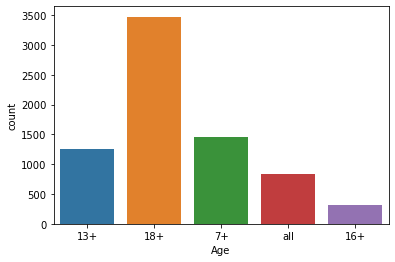

In [10]:
# countplot on age group
sns.countplot(x='Age', data=movies_merge)

Answer: 18+

**2b Question: Can you indentify any gaps that Netflix need to address?**

<AxesSubplot:xlabel='Age', ylabel='count'>

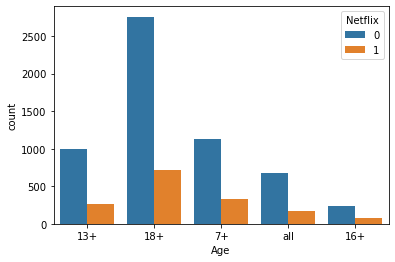

In [11]:
# countplot on age group and add Netflix as hue
sns.countplot(x='Age', hue='Netflix', data=movies_merge)

### Question 2b: ahhhhh??? what gaps?

### Plot a histogram for the IMDb rating column.

**3a Question: What do you understand from the histogram?**

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

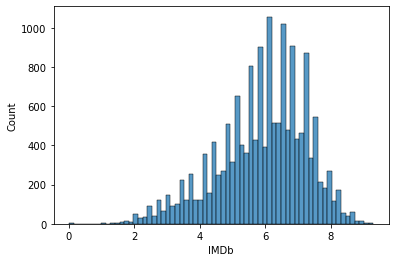

In [18]:
# histogram for IMDb rating
sns.histplot(data=movies_merge, x='IMDb')

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

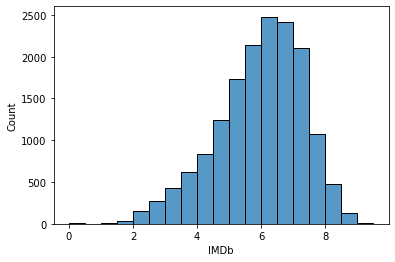

In [21]:
# histogram for IMDb rating
sns.histplot(data=movies_merge, x='IMDb', binwidth=0.5)

###  Question 3a: should be left-skewed?! but the first histogram generated shows differently....

**3b Question: What are the outliners?**

### Question 3b: how can it be identify by histogram?? can't figure out it yet....

### Plot a scatterplot using the scatterplot function to display the correlation between the ratings from Rotten Tomatoes and IMDb. 

**4a Question: What can you infer about the correlation?**

<AxesSubplot:xlabel='IMDb', ylabel='Rotten Tomatoes'>

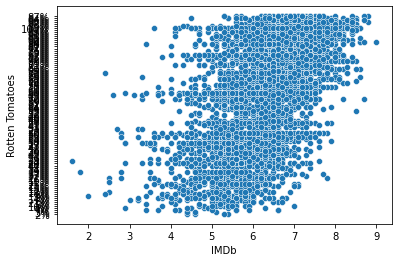

In [20]:
# scatterplot of ratings from Rotten Tomatoes and IMDb
sns.scatterplot(x='IMDb', y='Rotten Tomatoes', data=movies_merge)

### seems like it is not a good scatterplot as it is overplotted?!

**4b Question: If there is a correlation, is the relationship between the ratings strong or weak and positive or negative?**

### try to use regplot but fail...

TypeError: No loop matching the specified signature and casting was found for ufunc svd_n_s

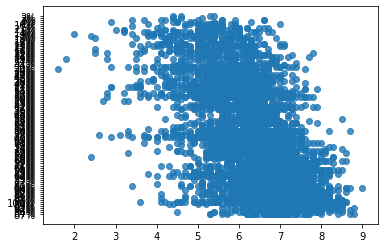

In [26]:
# scatterplot of ratings from Rotten Tomatoes and IMDb
sns.regplot(x='IMDb', y='Rotten Tomatoes', data=movies_merge)